# Logger examples

### Installation & set up

In [1]:
!pip install lavague

import os
# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
else:
    os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.8 MB/s eta 0:0

### Getting logs for Web Agent

In [2]:
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

selenium_driver = SeleniumDriver(headless=True)
action_engine = ActionEngine(selenium_driver)
world_model = WorldModel()

agent = WebAgent(world_model, action_engine)

agent.get("https://huggingface.co/")
agent.run("Go to the first Model in the Models section")

# Retrieve pandas DataFrame with logs
df_logs = agent.logger.return_pandas()

/usr/local/lib/python3.10/dist-packages/lavague/core/__init__.py:18: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)
/usr/local/lib/python3.10/dist-packages/lavague/core/__init__.py:23: UserWarning: Security warning: This package executes LLM-generated code. Consider using this package in a sandboxed environment.
  warnings.warn(warning_message, UserWarning)
2024-06-07 09:26:22,872 - INFO - Screenshot folder cleared
2024-06-07 09:26:28,486 - INFO - Thoughts:
- The current screenshot shows the homepage of Hugging Face, a platform for AI models, datasets, and applications.
- The objective is to go to the first model in the Models section.
- The Models section is visible on the left side of the screen.
- The first model listed in the Models section is "OpenAI GPT-3".

Next engine: Navigation Engine
Instruction: Click on the 'OpenAI GPT-3' model in the Models section.
2024-06-07 09:26:50,021 - IN

### Exploring logs

In [3]:
# Pandas option to ensure we show all text in column
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Print the code generated for step 0 of our run
step = 0
print(df_logs.at[step, 'code'])

# Let's think step by step

# First, we notice that the query asks us to click on the "OpenAI GPT-3" model in the Models section.

# In the provided HTML, we need to identify the section that contains the models.

# We need to locate the specific model named "OpenAI GPT-3".

# Upon examining the HTML structure, we see that each model is represented by an article element with a specific class.

# We need to navigate through the hierarchy to accurately locate the "OpenAI GPT-3" model.

# The correct model is located within an article element with a specific class and contains a header with the model name.

# Specifically, for "OpenAI GPT-3", there is an article element with a unique class and contains a header with the text "OpenAI GPT-3".

# We observe that this article element has the following XPath:
# /html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a

# Thus, we believe this is the correct element to be interacted with:
openai_gpt3_model = driver.find_element(By.XPATH, "/html

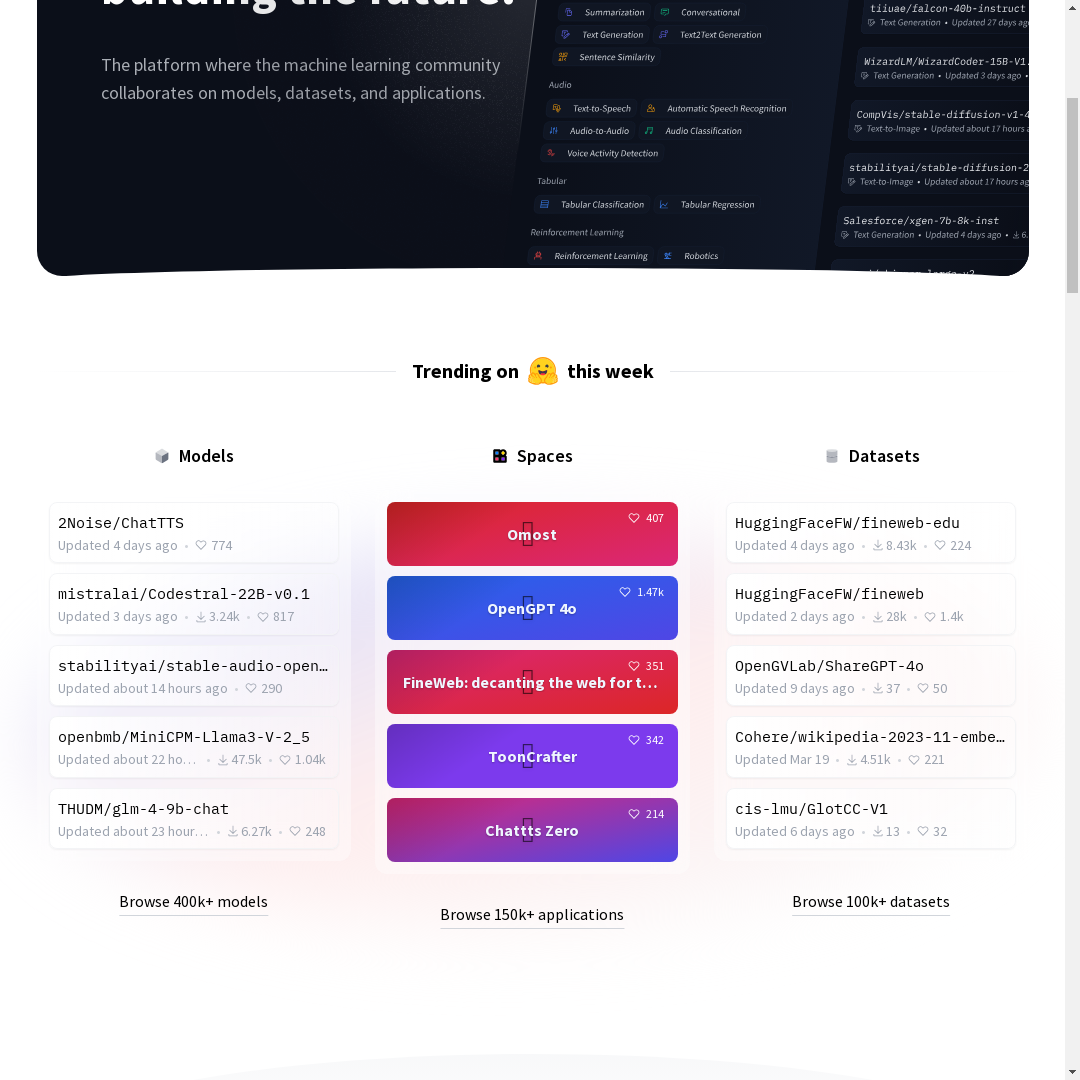

In [4]:
from IPython.display import display

step = 0
image = 0
display(df_logs["screenshots"][step][image])

In [5]:
# Print the World Model thoughts generated for step 0 of our run
step = 0
print(df_logs.at[step, 'world_model_output'])

Thoughts:
- The current screenshot shows the homepage of Hugging Face, a platform for AI models, datasets, and applications.
- The objective is to go to the first model in the Models section.
- The Models section is visible on the left side of the screen.
- The first model listed in the Models section is "OpenAI GPT-3".

Next engine: Navigation Engine
Instruction: Click on the 'OpenAI GPT-3' model in the Models section.


In [6]:
# Print the code generated for step 0 of our run
attempt = 0
from IPython.display import display, HTML, Code

# An instruction can be split into sub-instructions by the rephraser, but in this case there is just one instruction
sub_instruction = 0
x = 0
for node in df_logs.at[attempt, 'engine_log'][sub_instruction]['retrieved_html']:
    print(f"node {x}")
    x = x + 1
    display(HTML(node)) # Display node as visual element
    display(Code(node, language="html")) # Display code

node 0


<div class="mr-1 flex items-center overflow-hidden whitespace-nowrap text-sm leading-tight text-gray-400" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div">
<span class="truncate" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/span[1]">Updated
				<time datetime="2024-06-04T09:12:30" title="Tue, 04 Jun 2024 09:12:30 GMT" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/span[1]/time">3 days ago</time></span>
<span class="px-1.5 text-gray-300" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/span[2]">• </span>
<svg aria-hidden="true" class="flex-none w-3 text-gray-400 mr-0.5" focusable="false" height="1em" role="img" viewbox="0 0 32 32" width="1em" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/svg[1]"><path d="M26 24v4H6v-4H4v4a2 2 0 0 0 2 2h20a2 2 0 0 0 2-2v-4zm0-10l-1.41-1.41L17 20.17V2h-2v18.17l-7.59-7.58L6 14l10 10l10-10z" fill="currentColor" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/svg[1]/path"></path></svg>
				3.24k
			<span class="px-1.5 text-gray-300" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/span[3]">• </span>
<svg aria-hidden="true" class="flex-none w-3 text-gray-400 mr-1" fill="currentColor" focusable="false" height="1em" preserveaspectratio="xMidYMid meet" role="img" viewbox="0 0 32 32" width="1em" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/svg[2]"><path d="M22.45,6a5.47,5.47,0,0,1,3.91,1.64,5.7,5.7,0,0,1,0,8L16,26.13,5.64,15.64a5.7,5.7,0,0,1,0-8,5.48,5.48,0,0,1,7.82,0L16,10.24l2.53-2.58A5.44,5.44,0,0,1,22.45,6m0-2a7.47,7.47,0,0,0-5.34,2.24L16,7.36,14.89,6.24a7.49,7.49,0,0,0-10.68,0,7.72,7.72,0,0,0,0,10.82L16,29,27.79,17.06a7.72,7.72,0,0,0,0-10.82A7.49,7.49,0,0,0,22.45,4Z" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/svg[2]/path"></path></svg>
				817
			</div></a></article><article class="overview-card-wrapper group/repo white" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[3]"><a class="block p-2" href="/stabilityai/stable-audio-open-1.0" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[3]/a"><header class="flex items-center mb-0.5" title="stabilityai/stable-audio-open-1.0" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[3]/a/header">
<h4 class="text-md truncate font-mono text-black dark:group-hover/repo:text-yellow-500 group-hover/repo:text-indigo-600 text-smd" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[3]/a/header/h4">stabilityai/stable-audio-open-1.0</h4>
</header>

node 1


<div class="mr-1 flex items-center overflow-hidden whitespace-nowrap text-sm leading-tight text-gray-400" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div">
<span class="truncate" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/span[1]">Updated
				<time datetime="2024-06-04T09:12:30" title="Tue, 04 Jun 2024 09:12:30 GMT" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/span[1]/time">3 days ago</time></span>
<span class="px-1.5 text-gray-300" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/span[2]">• </span>
<svg aria-hidden="true" class="flex-none w-3 text-gray-400 mr-0.5" focusable="false" height="1em" role="img" viewbox="0 0 32 32" width="1em" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/svg[1]"><path d="M26 24v4H6v-4H4v4a2 2 0 0 0 2 2h20a2 2 0 0 0 2-2v-4zm0-10l-1.41-1.41L17 20.17V2h-2v18.17l-7.59-7.58L6 14l10 10l10-10z" fill="currentColor" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/svg[1]/path"></path></svg>
				3.24k
			<span class="px-1.5 text-gray-300" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/span[3]">• </span>
<svg aria-hidden="true" class="flex-none w-3 text-gray-400 mr-1" fill="currentColor" focusable="false" height="1em" preserveaspectratio="xMidYMid meet" role="img" viewbox="0 0 32 32" width="1em" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/svg[2]"><path d="M22.45,6a5.47,5.47,0,0,1,3.91,1.64,5.7,5.7,0,0,1,0,8L16,26.13,5.64,15.64a5.7,5.7,0,0,1,0-8,5.48,5.48,0,0,1,7.82,0L16,10.24l2.53-2.58A5.44,5.44,0,0,1,22.45,6m0-2a7.47,7.47,0,0,0-5.34,2.24L16,7.36,14.89,6.24a7.49,7.49,0,0,0-10.68,0,7.72,7.72,0,0,0,0,10.82L16,29,27.79,17.06a7.72,7.72,0,0,0,0-10.82A7.49,7.49,0,0,0,22.45,4Z" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[2]/a/div/svg[2]/path"></path></svg>
				817
			</div></a></article><article class="overview-card-wrapper group/repo white" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[3]"><a class="block p-2" href="/stabilityai/stable-audio-open-1.0" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[3]/a"><header class="flex items-center mb-0.5" title="stabilityai/stable-audio-open-1.0" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[3]/a/header">
<h4 class="text-md truncate font-mono text-black dark:group-hover/repo:text-yellow-500 group-hover/repo:text-indigo-600 text-smd" xpath="/html/body/div/main/div[2]/div[2]/div[2]/div/article[3]/a/header/h4">stabilityai/stable-audio-open-1.0</h4>
</header>

node 2


<div class="absolute opacity-60 text-4xl drop-shadow" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[3]/a/div[4]">🍷</div>
<h4 class="z-40 max-w-full truncate text-center font-bold leading-tight text-blue-50 text-md" style="text-shadow: 0px 1px 2px rgba(0, 0, 0, 0.25);" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[3]/a/h4">FineWeb: decanting the web for the finest text data at scale</h4>
</a>
</article><article class="" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]">
<a class="relative z-0 mx-auto flex flex-col items-center justify-center bg-gradient-to-br p-4 filter from-purple-600 to-purple-600 overflow-hidden hover:brightness-110 h-16 rounded-lg" href="/spaces/Doubiiu/tooncrafter" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a"><div class="absolute left-0 top-0 h-24 w-1/2 bg-gradient-to-br from-black/20 via-transparent to-transparent" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[1]"></div>
<div class="absolute right-16 flex flex-wrap content-start gap-1 overflow-hidden hidden" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[2]">
<div class="inline-flex cursor-pointer select-none items-center overflow-hidden font-mono inline-flex items-center rounded border !border-white/5 bg-white/10 leading-tight text-white opacity-80" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[2]/div"><div class="inline-flex items-center px-1 py-0" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[2]/div/div">
		Running
		
			<span class="mx-1" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[2]/div/div/span[1]">on </span>
<span class="-skew-x-6 truncate font-bold uppercase" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[2]/div/div/span[2]">Zero</span></div>
</div>
</div>
<div class="absolute flex items-center rounded-xl top-2 right-3.5 text-xs" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[3]"><svg aria-hidden="true" class="mr-1.5 text-white" fill="currentColor" focusable="false" height="1em" preserveaspectratio="xMidYMid meet" role="img" viewbox="0 0 32 32" width="1em" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[3]/svg"><path d="M22.45,6a5.47,5.47,0,0,1,3.91,1.64,5.7,5.7,0,0,1,0,8L16,26.13,5.64,15.64a5.7,5.7,0,0,1,0-8,5.48,5.48,0,0,1,7.82,0L16,10.24l2.53-2.58A5.44,5.44,0,0,1,22.45,6m0-2a7.47,7.47,0,0,0-5.34,2.24L16,7.36,14.89,6.24a7.49,7.49,0,0,0-10.68,0,7.72,7.72,0,0,0,0,10.82L16,29,27.79,17.06a7.72,7.72,0,0,0,0-10.82A7.49,7.49,0,0,0,22.45,4Z" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[3]/svg/path"></path></svg>
<span class="text-white" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[3]/span">342</span></div>
<div class="absolute opacity-60 text-4xl drop-shadow" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/div[4]">😻</div>
<h4 class="z-40 max-w-full truncate text-center font-bold leading-tight text-blue-50 text-md" style="text-shadow: 0px 1px 2px rgba(0, 0, 0, 0.25);" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[4]/a/h4">ToonCrafter</h4>
</a>
</article><article class="" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[5]">
<a class="relative z-0 mx-auto flex flex-col items-center justify-center bg-gradient-to-br p-4 filter from-pink-600 to-indigo-600 overflow-hidden hover:brightness-110 h-16 rounded-lg" href="/spaces/Dzkaka/ChatTTS" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[5]/a"><div class="absolute left-0 top-0 h-24 w-1/2 bg-gradient-to-br from-black/20 via-transparent to-transparent" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[5]/a/div[1]"></div>
<div class="absolute right-16 flex flex-wrap content-start gap-1 overflow-hidden hidden" xpath="/html/body/div/main/div[2]/div[2]/div[3]/div/article[5]/a/div[2]">

node 3


<div class="flex justify-between p-6 md:p-8" xpath="/html/body/div/main/div[3]/div[2]/div[4]/div[1]"><div xpath="/html/body/div/main/div[3]/div[2]/div[4]/div[1]/div"><h3 class="text-xl font-semibold 2xl:text-2xl" xpath="/html/body/div/main/div[3]/div[2]/div[4]/div[1]/div/h3">Build your portfolio</h3>
<p class="text-base text-gray-500 2xl:text-lg" xpath="/html/body/div/main/div[3]/div[2]/div[4]/div[1]/div/p">Share your work with the world and build your ML profile.</p></div>
<a class="flex-none self-start rounded-full border border-transparent bg-gray-900 px-2.5 py-1.5 text-smd leading-none text-white hover:border-black hover:bg-white hover:text-black" href="/join" xpath="/html/body/div/main/div[3]/div[2]/div[4]/div[1]/a">Sign Up
					</a></div>
<img alt="Younes Belkada Hugging Face profile" class="ml-auto w-full flex-1 overflow-hidden border-t border-gray-100 object-cover object-left-top" src="/front/assets/homepage/younes.svg" xpath="/html/body/div/main/div[3]/div[2]/div[4]/img"/>
<div class="pointer-events-none absolute inset-x-0 bottom-0 h-40 select-none bg-gradient-to-tl from-white/80 to-white/0" xpath="/html/body/div/main/div[3]/div[2]/div[4]/div[2]"></div></div></div>
<div class="flex w-full flex-col items-stretch pb-24 pt-24 text-center" xpath="/html/body/div/main/div[3]/div[3]"><div class="mb-2 flex items-center justify-center gap-2 text-xl font-bold" xpath="/html/body/div/main/div[3]/div[3]/div"><div class="mr-4 h-px flex-1 bg-gradient-to-l from-gray-100 to-white" xpath="/html/body/div/main/div[3]/div[3]/div/div[1]"></div>
<h2 class="text-3xl font-bold 2xl:text-4xl" xpath="/html/body/div/main/div[3]/div[3]/div/h2">Accelerate your ML</h2>
<div class="ml-4 h-px flex-1 bg-gradient-to-r from-gray-100 to-white" xpath="/html/body/div/main/div[3]/div[3]/div/div[2]"></div></div>
<p class="text-lg text-gray-500 2xl:text-xl" style="text-wrap: balance;" xpath="/html/body/div/main/div[3]/div[3]/p">We provide paid Compute and Enterprise solutions.
			</p></div>
<div class="mx-auto grid max-w-5xl grid-cols-1 gap-10 2xl:max-w-7xl" xpath="/html/body/div/main/div[3]/div[4]"><div class="col-span-1 grid h-[450px] grid-cols-1 items-center overflow-hidden rounded-xl border bg-white shadow-sm lg:h-[400px] lg:grid-cols-3" xpath="/html/body/div/main/div[3]/div[4]/div[1]"><div class="col-span-1 p-7 md:p-10" xpath="/html/body/div/main/div[3]/div[4]/div[1]/div[1]"><h3 class="mb-4 text-2xl font-semibold" xpath="/html/body/div/main/div[3]/div[4]/div[1]/div[1]/h3">Compute</h3>
<p class="mb-6 text-base text-gray-500 lg:mb-8 2xl:text-lg" style="text-wrap: balance;" xpath="/html/body/div/main/div[3]/div[4]/div[1]/div[1]/p">Deploy on optimized <a class="underline" href="/pricing#endpoints" xpath="/html/body/div/main/div[3]/div[4]/div[1]/div[1]/p/a[1]">Inference Endpoints</a> or update your
						<a class="underline" href="/pricing#spaces" xpath="/html/body/div/main/div[3]/div[4]/div[1]/div[1]/p/a[2]">Spaces applications</a> to a GPU in a few clicks.
					</p>
<div class="flex items-center gap-x-2.5 whitespace-nowrap sm:gap-x-3.5" xpath="/html/body/div/main/div[3]/div[4]/div[1]/div[1]/div"><a class="leading-black rounded-lg border border-transparent bg-black px-3.5 py-1 text-base text-white hover:border-black hover:bg-white hover:text-gray-900 2xl:text-lg" href="/pricing" xpath="/html/body/div/main/div[3]/div[4]/div[1]/div[1]/div/a">View pricing
						</a>
<p class="text-smd text-gray-400 2xl:text-base" xpath="/html/body/div/main/div[3]/div[4]/div[1]/div[1]/div/p">Starting at $0.60/hour for GPU</p></div></div>
<div class="col-span-1 self-stretch lg:col-span-2" xpath="/html/body/div/main/div[3]/div[4]/div[1]/div[2]"><img alt="Hugging face compute offering" class="pointer-events-none h-full w-full select-none bg-bottom object-cover object-left" src="/front/assets/homepage/compute.svg" xpath="/html/body/div/main/div[3]/div[4]/div[1]/div[2]/img"/></div></div>

### Advanced example: Logging lower level modules

In [13]:
from lavague.drivers.selenium import SeleniumDriver
from lavague.core.logger import AgentLogger
from lavague.core import ActionEngine

selenium_driver = SeleniumDriver(headless=True, url="https://huggingface.co/")
action_engine = ActionEngine(
    driver=selenium_driver,
)

# Initialize your logger
logger = AgentLogger()

In [14]:
# Start a new logging run
logger.new_run()

# Add logging to NavigationEngine
action_engine.navigation_engine.set_logger(logger)

obs = selenium_driver.get_obs()

In [15]:
# Engine & instruction
engine_name = "Navigation Engine"
instruction = "Show me the top model"

# Execute the instruction
ret = action_engine.dispatch_instruction(engine_name, instruction)

# Add required driver info to logs and end the logging step
logger.add_log(obs)
logger.end_step()

# Retrieve and print logs as a pandas DataFrame
df_logs = logger.return_pandas()